In [1]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from pprint import pprint
import pandas as pd 
import networkx

### 1. Define a simple corpus of sentences

The following is a simple corpus of sentences. Sentences in this example are not cleaned or normalized. 

The first four sentences share some common terms, like ordinal numbers and the word document.
When computing the PageRank these four sentences should be connected to each other due to their similarity.

The same applies to sentence 5 and 6, which share a greeting.

The last sentence should be treaten as a satellite to the whole corpus.

The same should apply if we clean and normalize the corpus, as the mentioned terms would be kept in the corpus.

In [2]:
corpus = [
     'This is the first document',
     'This document is the second document',
     'And this is the third one',
     'Is this the first document',
    
    'Hallo',
    'Hallo how are you',
    
    'I am alone'
 ]

In [3]:
pprint(corpus)

['This is the first document',
 'This document is the second document',
 'And this is the third one',
 'Is this the first document',
 'Hallo',
 'Hallo how are you',
 'I am alone']


### 2. Choose a word representation

Scikit-learn provides all the objects to represent the sentence in this corpus as vectors.

One common representation is the simple term frequency (TF).
Here each row is the document in the corpus (here: sentence) and each columns tells if the corresponding word is contained in the document (1) or not (0).

In [4]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print("Vocabulary:")
print(vectorizer.get_feature_names())
print("Representation:")
print(X.toarray())  

Vocabulary:
['alone', 'am', 'and', 'are', 'document', 'first', 'hallo', 'how', 'is', 'one', 'second', 'the', 'third', 'this', 'you']
Representation:
[[0 0 0 0 1 1 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 2 0 0 0 1 0 1 1 0 1 0]
 [0 0 1 0 0 0 0 0 1 1 0 1 1 1 0]
 [0 0 0 0 1 1 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [5]:
df = pd.DataFrame(X.toarray())
df.columns = vectorizer.get_feature_names()
df

,alone,am,and,are,document,first,hallo,how,is,one,second,the,third,this,you
0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
1,0,0,0,0,2,0,0,0,1,0,1,1,0,1,0
2,0,0,1,0,0,0,0,0,1,1,0,1,1,1,0
3,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
def build_feature_matrix(documents, feature_type="tfidf", vocabulary=[], stopwords=set(), n_range=(1,1)):  
    
    if feature_type == 'frequency':
        #bag of words model
        vectorizer = CountVectorizer(binary=True, ngram_range=n_range, 
                                     tokenizer= lambda x: x.split(" "), vocabulary=vocabulary)
    elif feature_type == 'tfidf':
        #tfidf model
        vectorizer = TfidfVectorizer(ngram_range=n_range, 
                                     vocabulary=vocabulary, tokenizer=lambda x: x.split(" "), sublinear_tf=True)
    elif feature_type == 'no_custom':
        
        vectorizer = TfidfVectorizer(analyzer="word", stop_words=STOPWORDS)
    else:
        raise Exception("Falsche Feature-Typ angegeben!")
        
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    return vectorizer, feature_matrix

In [7]:
vec, dt_matrix = build_feature_matrix(corpus,
                                      feature_type="frequency", vocabulary=None, n_range=(1,1))

In [8]:
vec.vocabulary_

{'this': 14,
 'is': 9,
 'the': 12,
 'first': 5,
 'document': 4,
 'second': 11,
 'and': 2,
 'third': 13,
 'one': 10,
 'hallo': 6,
 'how': 7,
 'are': 3,
 'you': 15,
 'i': 8,
 'am': 1,
 'alone': 0}

In [9]:
print("Generated word matrix:")
word_df = pd.DataFrame(dt_matrix.toarray())
word_df.columns = list(vec.vocabulary_.keys())
word_df

Generated word matrix:


,this,is,the,first,document,second,and,third,one,hallo,how,are,you,i,am,alone
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
word_df.T #transposed --> From the document perspective: Which document contains the word x?

,0,1,2,3,4,5,6
this,0.0,0.0,0.0,0.0,0.0,0.0,1.0
is,0.0,0.0,0.0,0.0,0.0,0.0,1.0
the,0.0,0.0,1.0,0.0,0.0,0.0,0.0
first,0.0,0.0,0.0,0.0,0.0,1.0,0.0
document,1.0,1.0,0.0,1.0,0.0,0.0,0.0
second,1.0,0.0,0.0,1.0,0.0,0.0,0.0
and,0.0,0.0,0.0,0.0,1.0,1.0,0.0
third,0.0,0.0,0.0,0.0,0.0,1.0,0.0
one,0.0,0.0,0.0,0.0,0.0,0.0,1.0
hallo,1.0,1.0,1.0,1.0,0.0,0.0,0.0


In [52]:
sim_df = pd.DataFrame(word_df.values.dot(word_df.T.values))
sim_df

,0,1,2,3,4,5,6
0,5.0,4.0,3.0,5.0,0.0,0.0,0.0
1,4.0,5.0,3.0,4.0,0.0,0.0,0.0
2,3.0,3.0,6.0,3.0,0.0,0.0,0.0
3,5.0,4.0,3.0,5.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,4.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,3.0


### 3 Similarity among sentences

To create a PageRank graph we need to compute the similarities between all the sentences in the corpus. A simple way to do this is to compute the dot product between a matrix and its transposed.

In [12]:
similarity_matrix = (dt_matrix * dt_matrix.T)

In [43]:
df_sim = pd.DataFrame(similarity_matrix.toarray())
cols = ["doc%s" %str(i) for i in range(len(df_sim))]
df_sim.columns = cols
df_sim

,doc0,doc1,doc2,doc3,doc4,doc5,doc6
0,5.0,4.0,3.0,5.0,0.0,0.0,0.0
1,4.0,5.0,3.0,4.0,0.0,0.0,0.0
2,3.0,3.0,6.0,3.0,0.0,0.0,0.0
3,5.0,4.0,3.0,5.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,4.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [53]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(word_df, word_df)
pd.DataFrame(cos_sim)

,0,1,2,3,4,5,6
0,1.000000,0.800000,0.547723,1.000000,0.0,0.0,0.0
1,0.800000,1.000000,0.547723,0.800000,0.0,0.0,0.0
2,0.547723,0.547723,1.000000,0.547723,0.0,0.0,0.0
3,1.000000,0.800000,0.547723,1.000000,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,1.0,0.5,0.0
5,0.000000,0.000000,0.000000,0.000000,0.5,1.0,0.0
6,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0


In [54]:
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)

In [55]:
similarity_graph_cos = networkx.from_numpy_matrix(cos_sim)

In [35]:
import matplotlib.pyplot as plt

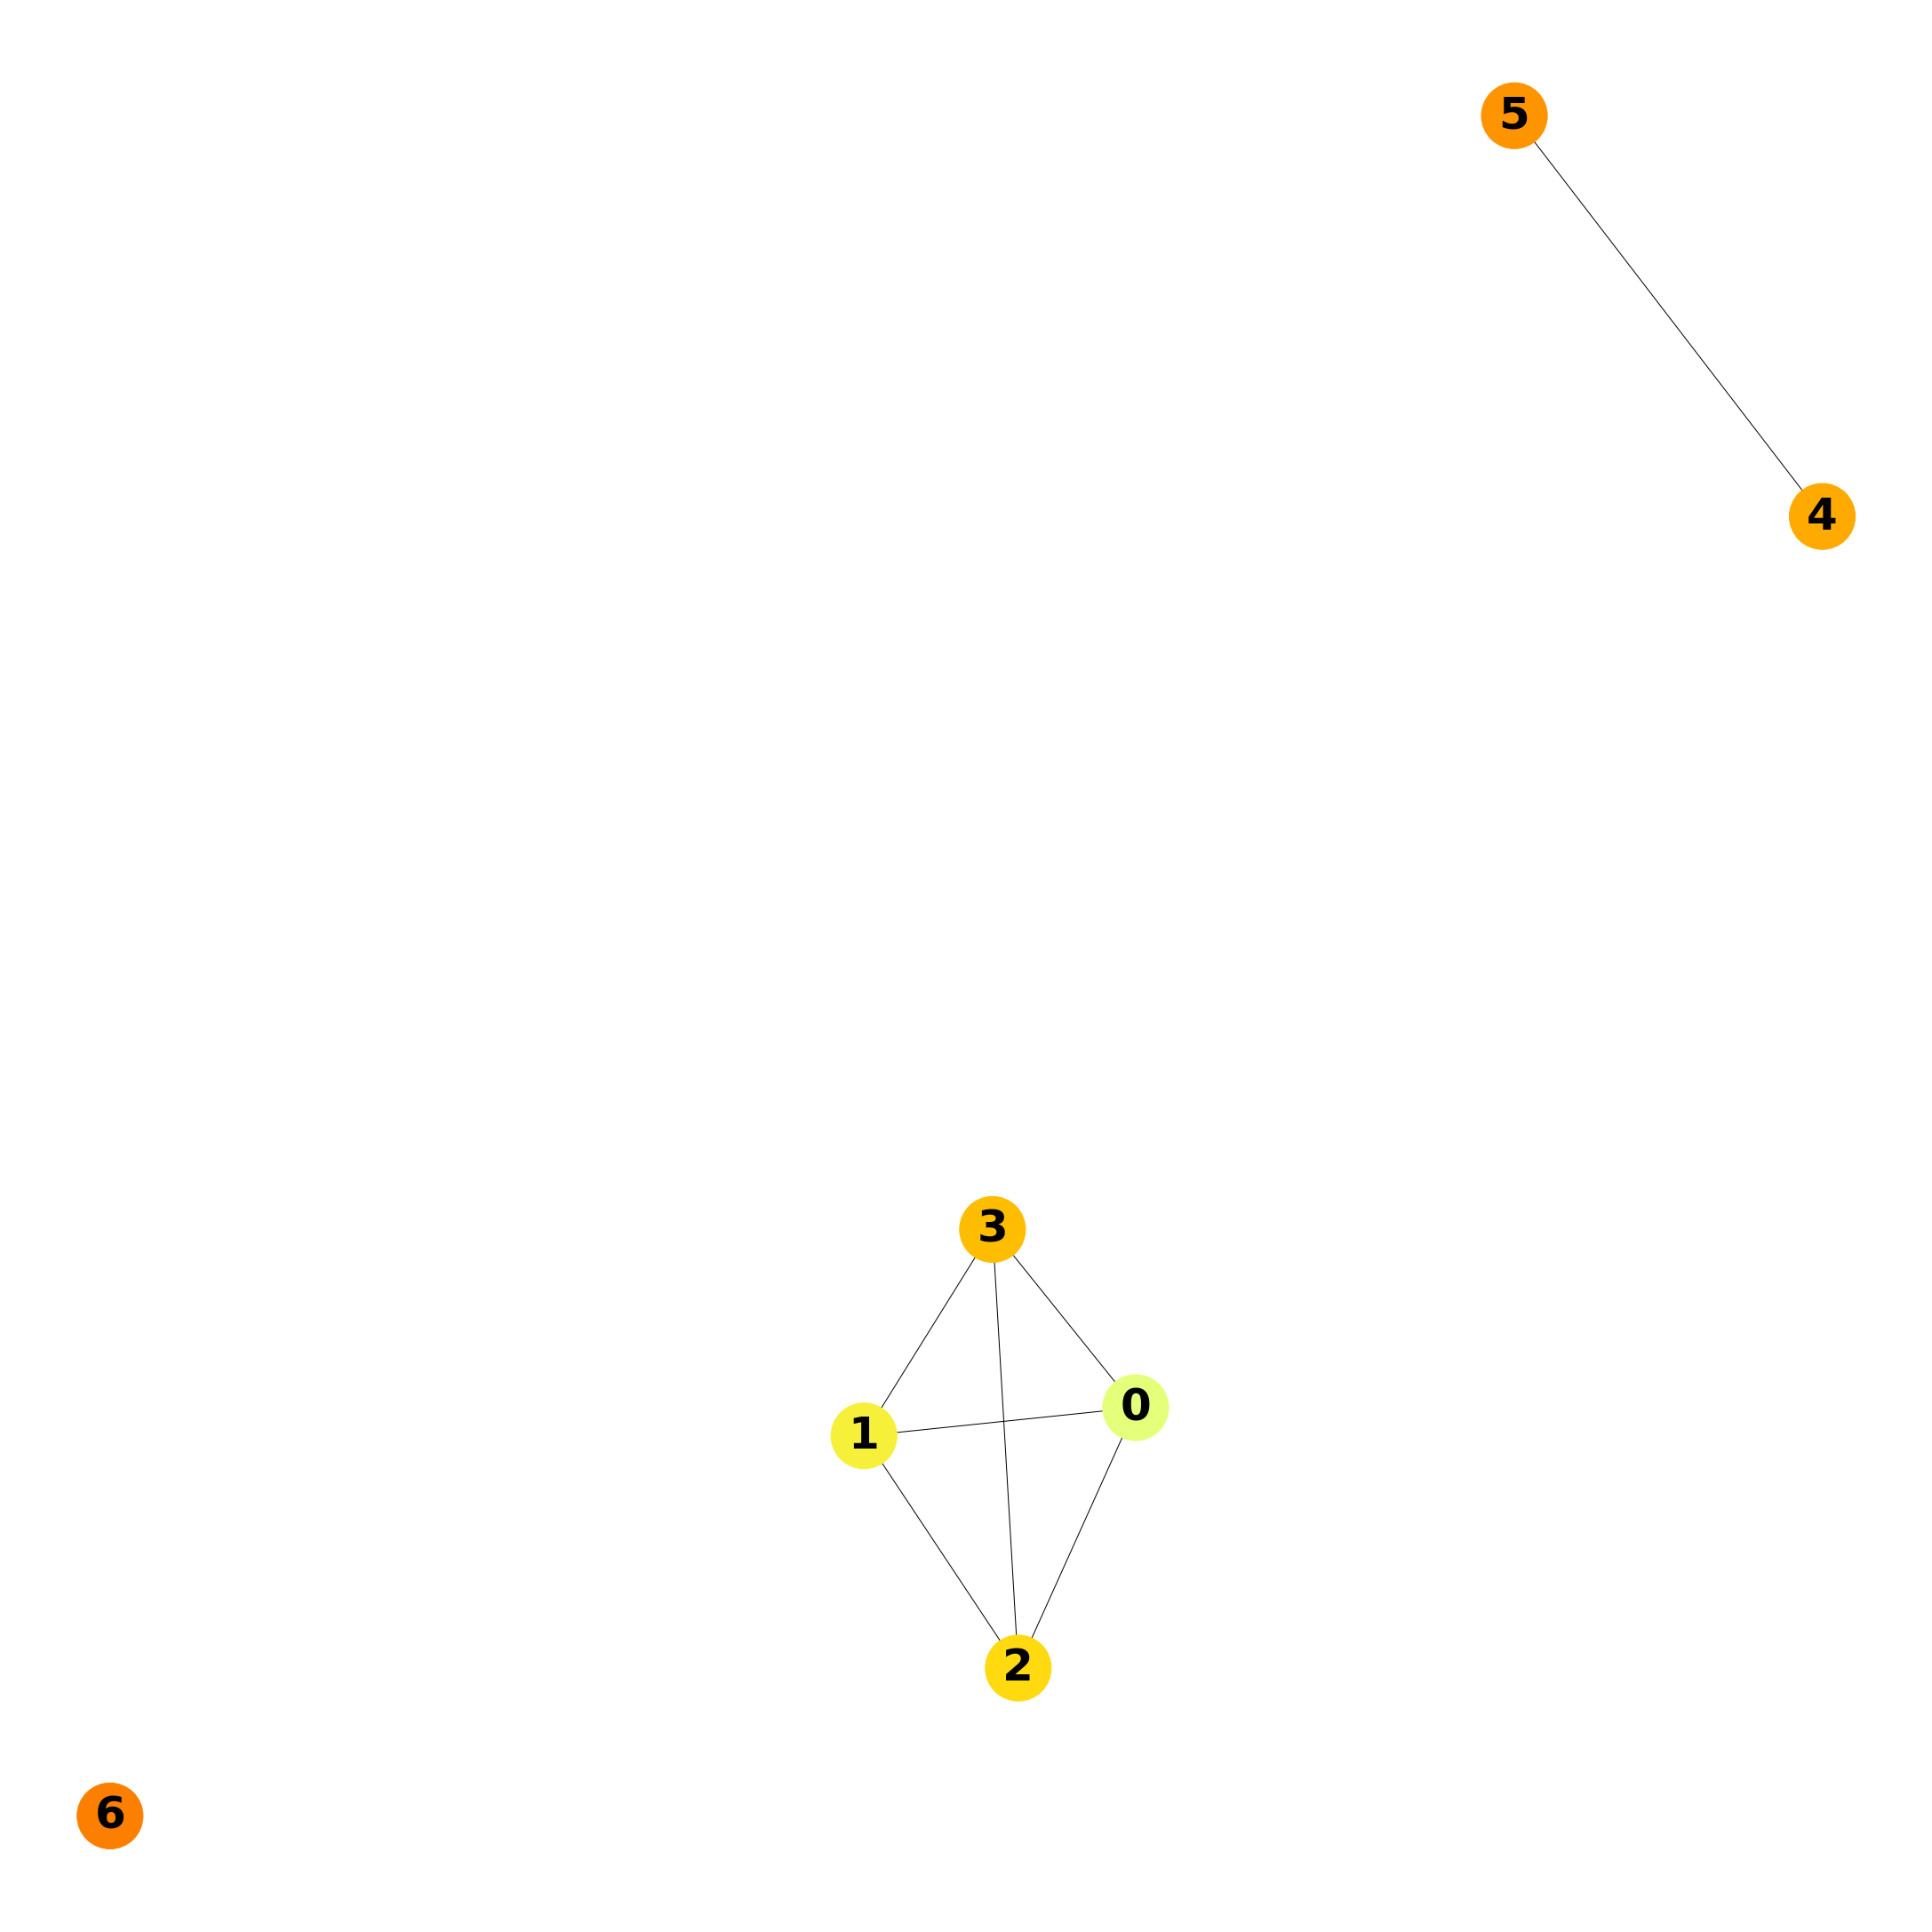

In [56]:
g = similarity_graph
    
#Spring layout
pos = networkx.spring_layout(g, iterations=20)
# pos = graphviz_layout(g)
plt.figure(figsize=(30, 30))
networkx.draw(g, pos=pos, node_size=5500, node_color=range(len(corpus)),
                      cmap=plt.cm.Wistia)
networkx.draw_networkx_labels(g, pos=pos, font_size=50, font_weight='bold')
plt.show()

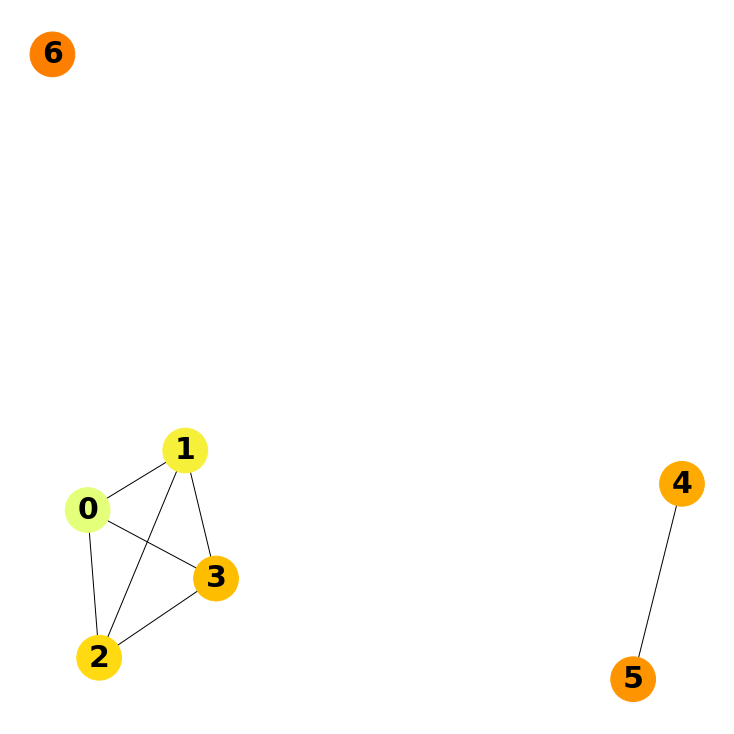

In [57]:
g = similarity_graph_cos
    
#Spring layout
pos = networkx.spring_layout(g, iterations=20)
# pos = graphviz_layout(g)
plt.figure(figsize=(10, 10))
networkx.draw(g, pos=pos, node_size=2000, node_color=range(len(corpus)),
                      cmap=plt.cm.Wistia)
networkx.draw_networkx_labels(g, pos=pos, font_size=30, font_weight='bold')
plt.show()

### TF_IDF

In [44]:
vec_idf, dt_matrix_idf = build_feature_matrix(corpus,
                                      feature_type="tfidf", vocabulary=None, n_range=(1,1))

In [45]:
vec_idf.vocabulary_

{'this': 14,
 'is': 9,
 'the': 12,
 'first': 5,
 'document': 4,
 'second': 11,
 'and': 2,
 'third': 13,
 'one': 10,
 'hallo': 6,
 'how': 7,
 'are': 3,
 'you': 15,
 'i': 8,
 'am': 1,
 'alone': 0}

In [46]:
print("Generated word matrix:")
word_idf = pd.DataFrame(dt_matrix_idf.toarray())
word_idf.columns = list(vec_idf.vocabulary_.keys())
word_idf

Generated word matrix:


,this,is,the,first,document,second,and,third,one,hallo,how,are,you,i,am,alone
0,0.00000,0.00000,0.000000,0.000000,0.464737,0.543701,0.000000,0.000000,0.00000,0.403489,0.000000,0.000000,0.403489,0.000000,0.403489,0.000000
1,0.00000,0.00000,0.000000,0.000000,0.634781,0.000000,0.000000,0.000000,0.00000,0.325501,0.000000,0.528394,0.325501,0.000000,0.325501,0.000000
2,0.00000,0.00000,0.491566,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.302814,0.491566,0.000000,0.302814,0.491566,0.302814,0.000000
3,0.00000,0.00000,0.000000,0.000000,0.464737,0.543701,0.000000,0.000000,0.00000,0.403489,0.000000,0.000000,0.403489,0.000000,0.403489,0.000000
4,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.00000,0.00000,0.000000,0.520647,0.000000,0.000000,0.432182,0.520647,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.520647
6,0.57735,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.57735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [47]:
similarity_matrix_idf = (dt_matrix_idf * dt_matrix_idf.T)

In [48]:
similarity_matrix_idf.toarray()

array([[1.        , 0.68901413, 0.36654602, 1.        , 0.        ,
        0.        , 0.        ],
       [0.68901413, 1.        , 0.29569904, 0.68901413, 0.        ,
        0.        , 0.        ],
       [0.36654602, 0.29569904, 1.        , 0.36654602, 0.        ,
        0.        , 0.        ],
       [1.        , 0.68901413, 0.36654602, 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.43218152, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.43218152,
        1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        ]])

In [49]:
df_sim_idf = pd.DataFrame(similarity_matrix_idf.toarray())
cols = ["doc%s" %str(i) for i in range(len(df_sim_idf))]
df_sim_idf.columns = cols
df_sim_idf

,doc0,doc1,doc2,doc3,doc4,doc5,doc6
0,1.000000,0.689014,0.366546,1.000000,0.000000,0.000000,0.0
1,0.689014,1.000000,0.295699,0.689014,0.000000,0.000000,0.0
2,0.366546,0.295699,1.000000,0.366546,0.000000,0.000000,0.0
3,1.000000,0.689014,0.366546,1.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,1.000000,0.432182,0.0
5,0.000000,0.000000,0.000000,0.000000,0.432182,1.000000,0.0
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0


In [50]:
similarity_graph = networkx.from_scipy_sparse_matrix(similarity_matrix)

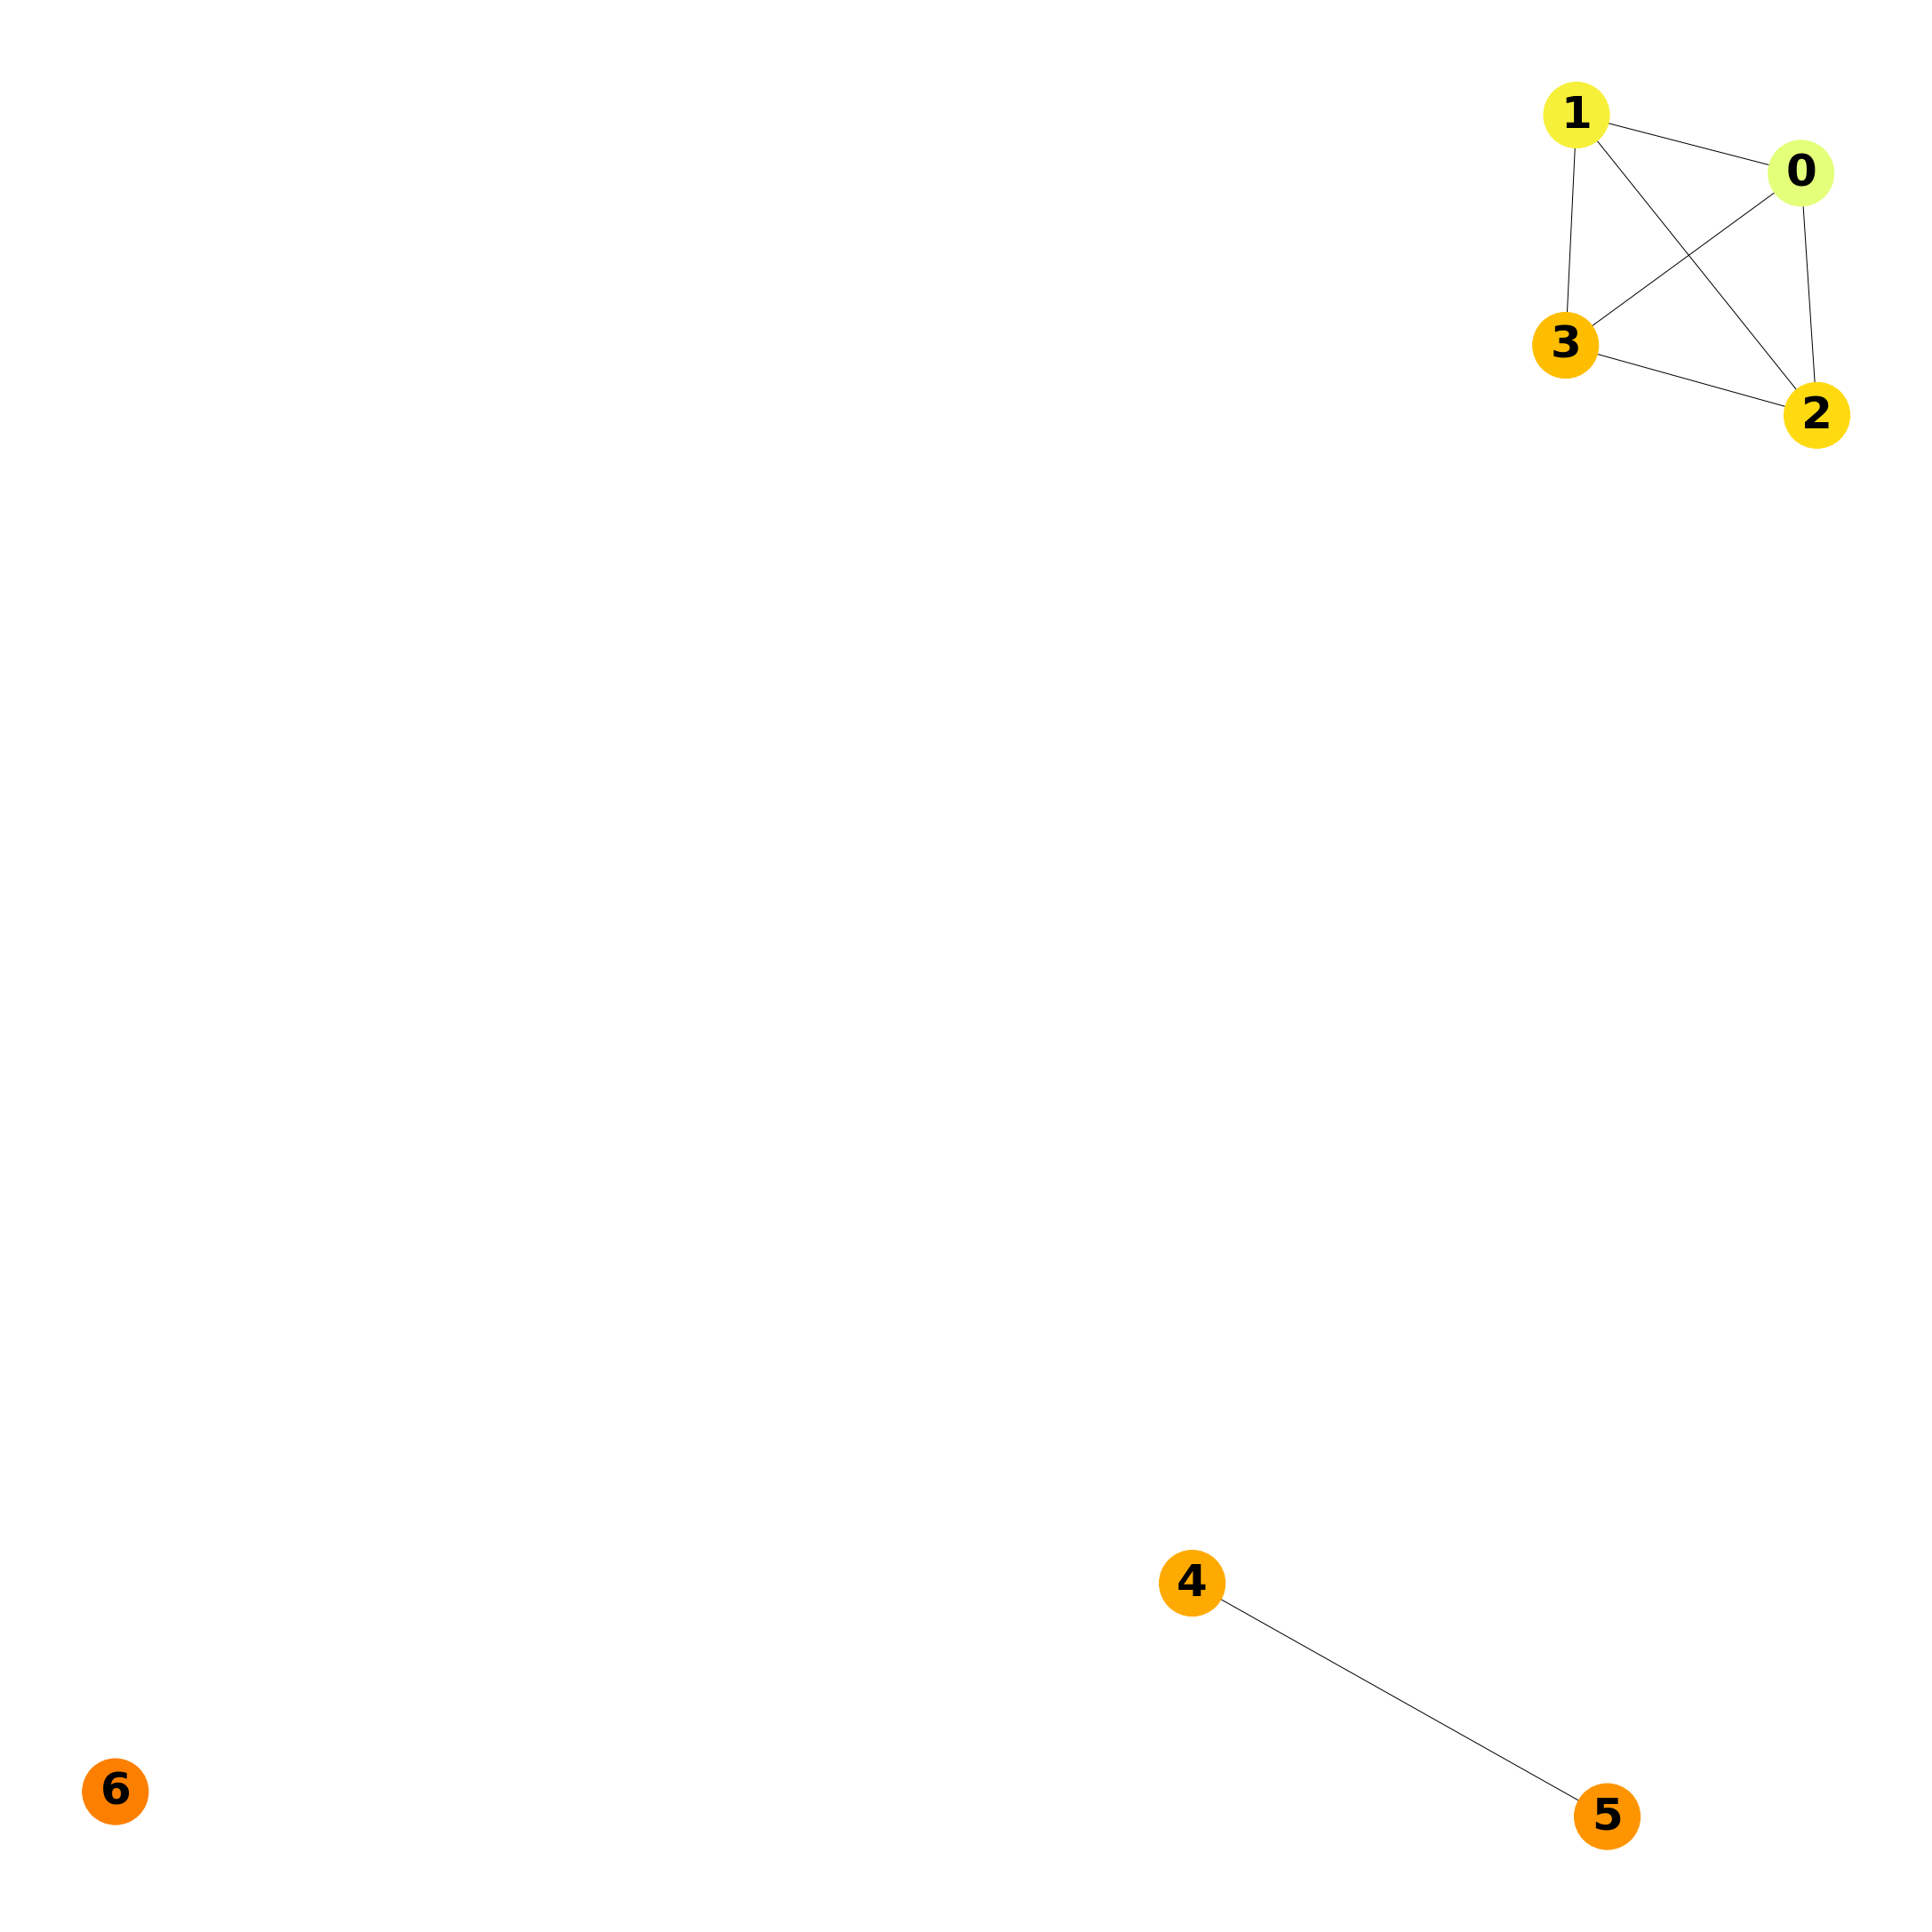

In [51]:
g = similarity_graph
    
#Spring layout
pos = networkx.spring_layout(g, iterations=20)
# pos = graphviz_layout(g)
plt.figure(figsize=(30, 30))
networkx.draw(g, pos=pos, node_size=5500, node_color=range(len(corpus)),
                      cmap=plt.cm.Wistia)
networkx.draw_networkx_labels(g, pos=pos, font_size=50, font_weight='bold')
plt.show()